In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import sys
import datetime
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
  #  fix random seed for reproducibility
  seed = 7
  np.random.seed(seed)

  # generate two datasets and print their shape
  X,y = make_moons(n_samples = 6000, noise = 0.08)
  print('X:\t{}' .format(X.shape))
  print('y:\t{}' .format(y.shape))
  print(type(X))
  print(type(y))

  # split data into train and test set
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

  # shape of training and test set
  print('X_train:\t{}' .format(X_train.shape))
  print('y_train:\t{}' .format(y_train.shape))
  print('X_test:\t\t{}'.format(X_test.shape))

X:	(6000, 2)
y:	(6000,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
X_train:	(4020, 2)
y_train:	(4020,)
X_test:		(1980, 2)


No handles with labels found to put in legend.


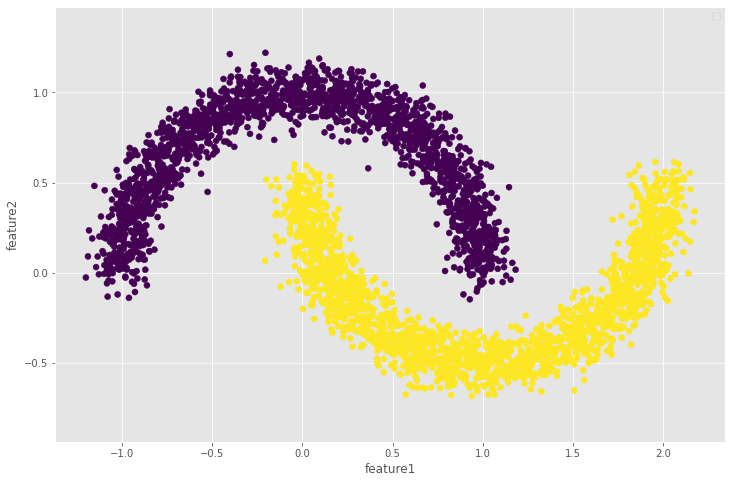

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(X_train[:,0],X_train[:,1], c = y_train)
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend()
plt.axis('equal')
plt.show()

In [ ]:
# Create a TensorBoard logger
csv_logger = keras.callbacks.CSVLogger(
    'training_logs.csv', separator=',', append=False)

checkpointer = keras.callbacks.ModelCheckpoint(filepath='models/sales.model.best.model.hdf5', 
                               verbose=1, save_best_only=True, save_weights_only=False)
# filepath='/models/mnist.model.best.weights.{epoch:02d}-{val_loss:.2f}.hdf5
RUN_NAME = 'XAYEL'
log_dir = "logs/fit/" + RUN_NAME +datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Create EarlyStopping callback
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.001, patience=5)

In [ ]:
l1_reg = keras.regularizers.l1(l=0.01)
model = Sequential()
model.add(Dense(40, input_dim = 2, activation='sigmoid',name = 'input_layer'))
model.add(Dense(60, activation='sigmoid',name = 'hidden_layer_one',))
model.add(Dense(60, activation='sigmoid',name = 'hidden_layer_two'))
model.add(Dense(1, activation='sigmoid', name='output_layer'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae','mse', 'acc'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 40)                120       
_________________________________________________________________
hidden_layer_one (Dense)     (None, 60)                2460      
_________________________________________________________________
hidden_layer_two (Dense)     (None, 60)                3660      
_________________________________________________________________
output_layer (Dense)         (None, 1)                 61        
Total params: 6,301
Trainable params: 6,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss' ,min_delta=0.001, patience=5)
history = model.fit(
    X_train,
    y_train,
    batch_size = 15,
    epochs=70,
    shuffle=True,
    verbose=2,
    callbacks=[early_stopping]
)

Epoch 1/70
268/268 - 0s - loss: 0.2182 - mae: 0.4593 - mse: 0.2182 - acc: 0.6547
Epoch 2/70
268/268 - 0s - loss: 0.1045 - mae: 0.2549 - mse: 0.1045 - acc: 0.8408
Epoch 3/70
268/268 - 0s - loss: 0.0853 - mae: 0.1999 - mse: 0.0853 - acc: 0.8764
Epoch 4/70
268/268 - 0s - loss: 0.0827 - mae: 0.1822 - mse: 0.0827 - acc: 0.8811
Epoch 5/70
268/268 - 0s - loss: 0.0824 - mae: 0.1797 - mse: 0.0824 - acc: 0.8808
Epoch 6/70
268/268 - 0s - loss: 0.0825 - mae: 0.1767 - mse: 0.0825 - acc: 0.8789
Epoch 7/70
268/268 - 0s - loss: 0.0824 - mae: 0.1742 - mse: 0.0824 - acc: 0.8791
Epoch 8/70
268/268 - 0s - loss: 0.0822 - mae: 0.1772 - mse: 0.0822 - acc: 0.8796
Epoch 9/70
268/268 - 0s - loss: 0.0827 - mae: 0.1770 - mse: 0.0827 - acc: 0.8784
Epoch 10/70
268/268 - 0s - loss: 0.0828 - mae: 0.1775 - mse: 0.0828 - acc: 0.8796
Epoch 11/70
268/268 - 0s - loss: 0.0827 - mae: 0.1776 - mse: 0.0827 - acc: 0.8803
Epoch 12/70
268/268 - 0s - loss: 0.0820 - mae: 0.1772 - mse: 0.0820 - acc: 0.8806
Epoch 13/70
268/268 - 0s 

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict_classes(X_test)
cm = confusion_matrix(y_test, y_pred)
print('confusion matrix is :',cm )

confusion matrix is : [[983   0]
 [  0 997]]


In [ ]:
model.evaluate(X_test, y_test)

62/62 [==============================] - 0s 1ms/step - loss: 1.8513e-04 - mae: 0.0019 - mse: 1.8513e-04 - acc: 1.0000


[0.00018512817041482776, 0.0018994478741660714, 0.00018512817041482776, 1.0]